In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2 

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
cd '/content/gdrive/My Drive/Projects /RL_Driving/ld8/video files'

/content/gdrive/My Drive/Projects /RL_Driving/ld8/video files


In [6]:
#resize image  new_width=256, new_height=256,
def prep_img(path):
  size=(256,256)
  img=cv2.imread(path)
  cv2.resize(img, size)
  return img


In [7]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [8]:
def run_detector(detector, path):
  img = prep_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  result = detector(converted_img)
  #result = {key:value.numpy() for key,value in result.items()}

  #print("Found %d objects." % len(result["detection_scores"]))
  #print("Inference time: ", end_time-start_time)
  

  
  image_with_boxes = draw_boxes(
      img, result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])
  
  return image_with_boxes

In [35]:
classes_to_consider=['Car','Person','Land vehicle','Vehicle','Van','Truck']

In [36]:
def draw_boxes(image, boxes, class_names, scores):
  #print(boxes)
  y=image.shape[0]
  x=image.shape[1]
  
  num=boxes.shape[0]
  #print(num)
  
  for i in range (0,num):


    #print(i)
    det_score=scores[i].numpy()
    
    #print(det_score)

    threshold=0.1
    
    if(det_score>threshold):

      class_name=class_names[i].numpy()
      #class_name=class_names[i]
      class_name=str(class_name, 'UTF-8')
      #if class_name in classes_li:
      #  pass
      #else:
      #  classes_li.append(class_name)
      #print(class_name)
      if class_name in classes_to_consider:
        box=boxes[i].numpy()
        ymin=int(box[0]*y)
        xmin=int(box[1]*x)
        ymax=int(box[2]*y)
        xmax=int(box[3]*x)
        #print(i,"c")
        
        image=cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(0,255,0),2)

        font = cv2.FONT_HERSHEY_SIMPLEX
        org = (int((xmin+xmax)/2) ,int((ymin+ymax)/2))
        fontScale = 1
        color = (255, 0, 0)
        thickness = 2
        image = cv2.putText(image,class_name, org, font, 
                          fontScale, color, thickness, cv2.LINE_AA)
    

  return image 

In [10]:
img=run_detector(detector,'520.jpg')

100


In [ ]:
import os
import cv2

output="t3_det.mp4"
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Be sure to use lower case

#frame = cv2.imread("520.jpg")
height, width, channels = img.shape
out = cv2.VideoWriter(output, fourcc, 20.0, (width, height))

# Opens the Video file
i=0;
#video_name="y.avi"
cap= cv2.VideoCapture('t3_full_results.mp4')
#video = cv2.VideoWriter(video_name, 0, 1, (720, 1280)) 
while(cap.isOpened()):
    i=i+1;
    print(i);
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('img'+'.jpg',frame)
    img=run_detector(detector,'img.jpg')
    #img=test("img.jpg","res.txt",griding_num)
    out.write(img)
    os.remove("img.jpg")
    #if(i==200):
    #  break
out.release()
    
 

1
2
3
4
5
6
7
8
9
10
11


In [15]:
blk = np.zeros(shape=[512, 512], dtype=np.uint8)

In [17]:
cv2.imwrite("y.jpg",blk)

True

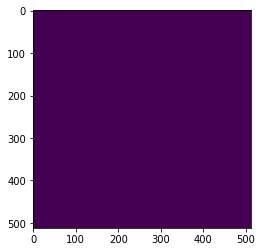

In [16]:
from matplotlib import pyplot as plt
plt.imshow(blk)
plt.show()